In [1]:
#visualisasi
import matplotlib.pyplot as plt

#ekstrak zip file
import zipfile

#library untuk ml
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#untuk mencoba hasil model
import numpy as np
from keras.preprocessing import image
from google.colab import files
import matplotlib.image as mpimg

Using TensorFlow backend.


In [2]:
#get dataset
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2020-06-28 16:47:04--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  22.6MB/s    in 13s     

2020-06-28 16:47:18 (24.3 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#extract zip dataset
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [5]:
#augmentasi data dan split data
data_augmentation = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.2
)

#data train
data_train = data_augmentation.flow_from_directory(
    base_dir,
    target_size = (224, 224),
    class_mode = 'categorical',
    subset = 'training'
)

#data validation
data_valid = data_augmentation.flow_from_directory(
    base_dir,
    target_size = (224, 224),
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [6]:
#pembuatan model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [7]:
#hasil layer model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 559875    
Total params: 579,267
Trainable params: 579,267
Non-trainable params: 0
__________________________________________________

In [8]:
#latih model langkah ke 1
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

In [9]:
#latih model langkah ke 2
history = model.fit(
   data_train,
   steps_per_epoch = 25,
   epochs = 15,
   validation_data = data_valid,
   validation_steps = 10,
   verbose = 1 
)

Epoch 1/15
25/25 [==============================] - 52s 2s/step - loss: 1.4769 - accuracy: 0.3950 - val_loss: 1.0751 - val_accuracy: 0.3844
Epoch 2/15
25/25 [==============================] - 52s 2s/step - loss: 0.9463 - accuracy: 0.5675 - val_loss: 0.7688 - val_accuracy: 0.7469
Epoch 3/15
25/25 [==============================] - 51s 2s/step - loss: 0.7901 - accuracy: 0.6839 - val_loss: 0.7372 - val_accuracy: 0.7031
Epoch 4/15
25/25 [==============================] - 53s 2s/step - loss: 0.7559 - accuracy: 0.6950 - val_loss: 0.7427 - val_accuracy: 0.7406
Epoch 5/15
25/25 [==============================] - 51s 2s/step - loss: 0.7256 - accuracy: 0.7257 - val_loss: 0.6737 - val_accuracy: 0.7656
Epoch 6/15
25/25 [==============================] - 51s 2s/step - loss: 0.6041 - accuracy: 0.7649 - val_loss: 0.6704 - val_accuracy: 0.7156
Epoch 7/15
25/25 [==============================] - 52s 2s/step - loss: 0.5389 - accuracy: 0.8037 - val_loss: 0.5777 - val_accuracy: 0.8000
Epoch 8/15
25/25 [==

In [10]:
#untuk mengetahui dictionary key yang tersedia
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


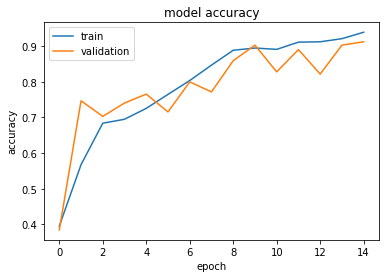

In [11]:
#visualisasi hasil akurasi training model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

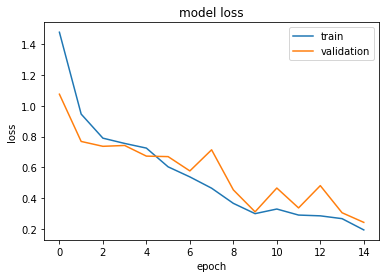

In [12]:
#visualisasi hasil loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

Saving gunting_test3.jpg to gunting_test3.jpg
gunting_test3.jpg
[[0. 0. 1.]]
scissor


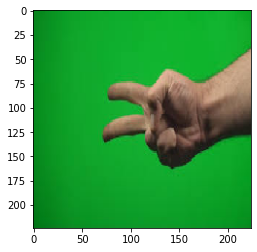

In [30]:
#mencoba hasil model
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(224,224))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)

    print(fn)
    print(classes)
    if(classes[0][0] == 1):
        print('paper')
    elif(classes[0][1] == 1):
        print('rock')
    elif(classes[0][2] == 1):
        print('scissor')

Saving batu_test2.jpg to batu_test2.jpg
batu_test2.jpg
[[0. 1. 0.]]
rock


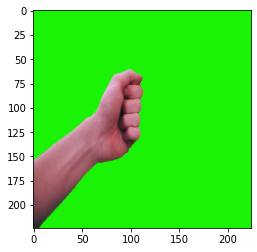

In [31]:
#mencoba hasil model
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(224,224))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)

    print(fn)
    print(classes)
    if(classes[0][0] == 1):
        print('paper')
    elif(classes[0][1] == 1):
        print('rock')
    elif(classes[0][2] == 1):
        print('scissor')

Saving 08.jpg to 08.jpg
08.jpg
[[1. 0. 0.]]
paper


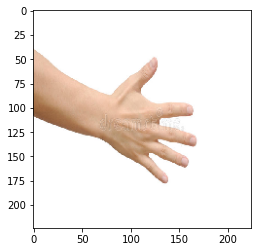

In [33]:
#mencoba hasil model
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(224,224))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)

    print(fn)
    print(classes)
    if(classes[0][0] == 1):
        print('paper')
    elif(classes[0][1] == 1):
        print('rock')
    elif(classes[0][2] == 1):
        print('scissor')

In [ ]:
#paper = 1,0,0
#rock = 0,1,0
#scissor = 0,0,1